In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,OrdinalEncoder

import folium
import plotly.express as px

In [37]:
df_bmw=pd.read_csv("C:/Users/34654/Desktop/primer_entregable/bmw_pricing_v3.csv")
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [38]:
for i in ["fecha_registro","fecha_venta"]:
    df_bmw[i]=pd.to_datetime(df_bmw[i])
    

df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [39]:
# Eliminamos la columna de marca, ya que no nos aporta mucha información.
df_bmw.drop('marca',axis=1,inplace=True)

df_bmw.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [40]:
df_bmw[['fecha_registro']].isnull().sum()

fecha_registro    2423
dtype: int64

In [41]:
# Filtamos estas columnas para dejar solo los valores sin nulos. Guardamos los cambios en un nuevo dataset. 
columnas_a_limpiar = ['modelo', 'km','potencia','tipo_gasolina','volante_regulable','camara_trasera','elevalunas_electrico','precio','fecha_venta']
df2_bmw = df_bmw.dropna(subset=columnas_a_limpiar)

In [42]:
df2_bmw.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2409
tipo_gasolina                     0
color                           442
tipo_coche                     1449
volante_regulable                 0
aire_acondicionado              482
camara_trasera                    0
asientos_traseros_plegables    3373
elevalunas_electrico              0
bluetooth                       725
gps                               0
alerta_lim_velocidad            725
precio                            0
fecha_venta                       0
dtype: int64

In [43]:
df2_bmw.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [44]:
df3_bmw = df2_bmw.copy()

In [45]:
df3_bmw['potencia'].value_counts()

potencia
135.0    873
120.0    783
85.0     629
100.0    567
105.0    446
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: count, Length: 61, dtype: int64

In [46]:
# Quitamos los outliers de la columna 'km'. 
df3_bmw.drop(df3_bmw[((df3_bmw["km"]<0) | (df3_bmw["km"]>400000))].index, inplace=True)

<Axes: >

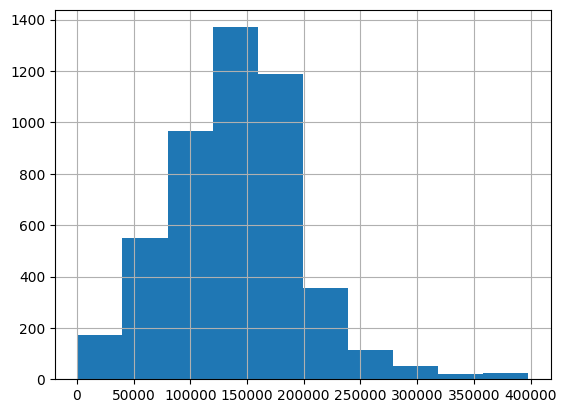

In [47]:
df3_bmw['km'].hist()

In [48]:
#Quitamos los outiers que salen de tener menos potencia de 50 y mas de 400
df3_bmw.drop(df3_bmw[((df3_bmw["potencia"]<=50) | (df3_bmw["potencia"]>=400))].index, inplace=True)

In [54]:
# Eliminamos la columna, puesto que, hay mas de 50% de nulos.
df3_bmw.drop('fecha_registro', axis=1, inplace=True)

In [55]:
df3_bmw[((df3_bmw["precio"]<=100) | (df3_bmw["precio"]>=60000))]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
90,i8,12402.0,170.0,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
565,320,179358.0,120.0,diesel,black,NaN,False,True,False,NaN,False,False,True,True,100.0,2018-03-01
879,318,134156.0,105.0,diesel,grey,estate,False,True,False,NaN,False,False,False,True,100.0,2018-04-01
1255,320,170381.0,135.0,diesel,silver,NaN,True,True,False,NaN,False,False,True,False,100.0,2018-05-01
1832,116,174524.0,85.0,diesel,blue,hatchback,False,True,False,NaN,False,False,True,NaN,100.0,2018-03-01
2678,530,5578.0,195.0,diesel,grey,sedan,True,True,True,NaN,False,NaN,True,True,62500.0,2018-02-01
2824,740,58299.0,235.0,diesel,grey,sedan,True,True,False,NaN,False,False,True,True,63700.0,2018-03-01
3069,740,42655.0,235.0,diesel,grey,NaN,True,True,True,True,False,False,True,NaN,65400.0,2018-05-01
3320,740,25858.0,235.0,diesel,black,sedan,True,True,False,True,False,NaN,True,True,68300.0,2018-06-01


In [56]:
#borramos los outliers de recio que sean menores o iguales de 100 y mayores de 75000
df3_bmw.drop(df3_bmw[((df3_bmw["precio"]<=100) | (df3_bmw["precio"]>=75000))].index, inplace=True)

modelo 
 modelo
320                743
520                629
318                560
X3                 435
116                357
                  ... 
ActiveHybrid 5       1
M135                 1
225                  1
630                  1
214 Gran Tourer      1
Name: count, Length: 74, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 tipo_gasolina
diesel           4595
petrol            189
Diesel              5
hybrid_petrol       5
electro             3
Name: count, dtype: int64 

color 
 color
black     1483
grey      1063
blue       639
white      478
brown      302
silver     288
red         46
beige       37
green       14
orange       6
Name: count, dtype: int64 

tipo_coche 
 tipo_coche
estate         1094
sedan           818
suv             749
hatchback       486
subcompact       77
coupe            72
convertible      30
van              28
Name: count, dtype: int64 

volante_regulable 
 volante_regulable
True 

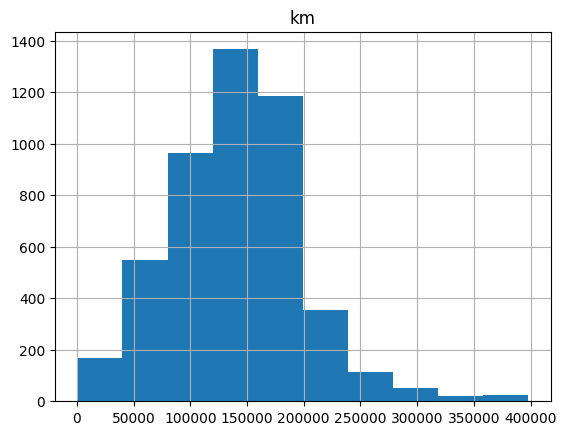

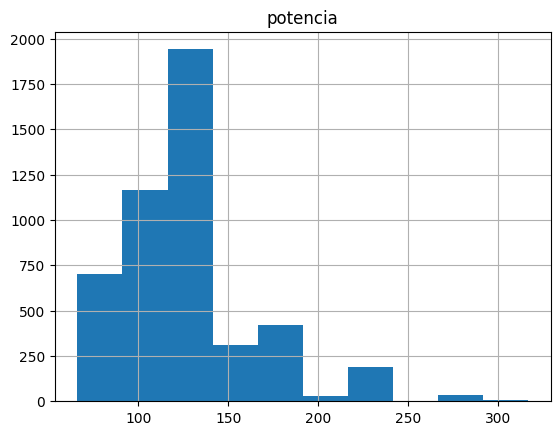

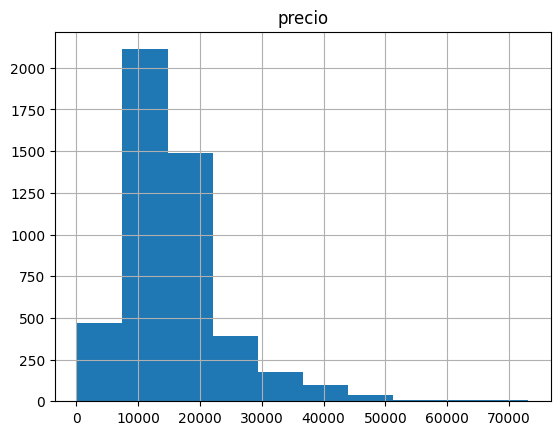

In [58]:
# Bucle para ver en general las columnas. 
for i in df3_bmw:
  if (df3_bmw[i].dtype.kind == "O") or (df3_bmw[i].dtype.kind == "B"):
    print(i,'\n', df3_bmw[i].value_counts(), '\n')
  elif (df3_bmw[i].dtype.kind=="f") or (df3_bmw[i].dtype.kind=="i"):
    print(df3_bmw.hist(i))

In [59]:
df3_bmw.describe()

,km,potencia,precio,fecha_venta
count,4797.000000,4797.000000,4797.000000,4797
mean,140548.500938,128.937878,15766.791745,2018-04-26 17:08:26.566604288
min,476.000000,66.000000,200.000000,2007-08-01 00:00:00
25%,102856.000000,100.000000,10900.000000,2018-03-01 00:00:00
50%,140829.000000,120.000000,14200.000000,2018-05-01 00:00:00
75%,175174.000000,135.000000,18600.000000,2018-07-01 00:00:00
max,398043.000000,317.000000,73100.000000,2018-09-01 00:00:00
std,58133.658590,38.471764,8539.541056,NaN


In [60]:
df3_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4797 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4797 non-null   object        
 1   km                           4797 non-null   float64       
 2   potencia                     4797 non-null   float64       
 3   tipo_gasolina                4797 non-null   object        
 4   color                        4356 non-null   object        
 5   tipo_coche                   3354 non-null   object        
 6   volante_regulable            4797 non-null   object        
 7   aire_acondicionado           4316 non-null   object        
 8   camara_trasera               4797 non-null   object        
 9   asientos_traseros_plegables  1440 non-null   object        
 10  elevalunas_electrico         4797 non-null   object        
 11  bluetooth                    4076 non-null   obj

In [63]:
df3_bmw['color'].value_counts()

color
black     1483
grey      1063
blue       639
white      478
brown      302
silver     288
red         46
beige       37
green       14
orange       6
Name: count, dtype: int64

In [ ]:
colores_exist = df['color'].dropna().unique()
df['color'].fillna(np.random.choice(colores_exist), inplace=True)

In [65]:
#cambiamos sus nulos por 'Sin Especificar'
df3_bmw['color'].fillna('Sin Especificar', inplace=True)

In [69]:
df3_bmw

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,218 Active Tourer,49832.0,100.0,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,218 Gran Tourer,19633.0,110.0,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,218 Active Tourer,27920.0,110.0,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


In [72]:
df3_bmw['tipo_coche'].value_counts()

tipo_coche
estate         1094
sedan           818
suv             749
hatchback       486
subcompact       77
coupe            72
convertible      30
van              28
Name: count, dtype: int64

In [73]:
#cambiamos sus nulos por 'Sin Especificar'
df3_bmw['tipo_coche'].fillna('Sin Especificar', inplace=True)

In [74]:
df3_bmw['tipo_coche'].isnull().sum()

0